<a href="https://colab.research.google.com/github/Shelvira4/Tugas_Naive-Bayes_dan_KNN/blob/main/Shelvira%20Rizki%20Lestari_(4101422047)_Tugas%20Naive-Bayes%20dan%20KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NAMA : SHELVIRA RIZKI LESTARI**

**NIM  : 4101422047**


**TUGAS NAIVE BAYES DAN K-NEAREST NEIGHBORS (KNN)**

**Soal Praktik**

**1). Mencari dan menampilkan dataset klasifikasi**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [33]:
# Pemanggilan data
data_PCOS = pd.read_csv("/content/pcos_dataset.csv")

In [34]:
# Menampilkan data
data_PCOS

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
0,24,34.7,1,25.2,20,0
1,37,26.4,0,57.1,25,0
2,32,23.6,0,92.7,28,0
3,28,28.8,0,63.1,26,0
4,25,22.1,1,59.8,8,0
...,...,...,...,...,...,...
995,34,18.4,1,95.7,23,0
996,45,28.9,1,28.5,7,0
997,37,28.3,0,32.4,28,0
998,41,27.3,0,95.6,9,0


**Menghitung label pada variabel target**

In [35]:
#Menghitung nilai label pada pasien yang terdiagnosis PCOS
count_values = data_PCOS['PCOS_Diagnosis'].value_counts()
count_values

,count
PCOS_Diagnosis,
0,801
1,199


In [36]:
# Menghitung rata-rata berdasarkan nilai 'PCOS_Diagnosis'
mean_by_PCOS_Diagnosis = data_PCOS.groupby('PCOS_Diagnosis').mean()

# Menampilkan rata-rata untuk setiap variabel berdasarkan nilai 'PCOS_Diagnosis'
print(mean_by_PCOS_Diagnosis)


                      Age        BMI  Menstrual_Irregularity  \
PCOS_Diagnosis                                                 
0               32.043695  25.457928                0.413233   
1               30.673367  30.126633                1.000000   

                Testosterone_Level(ng/dL)  Antral_Follicle_Count  
PCOS_Diagnosis                                                    
0                               57.842447              16.792759  
1                               69.485930              20.190955  


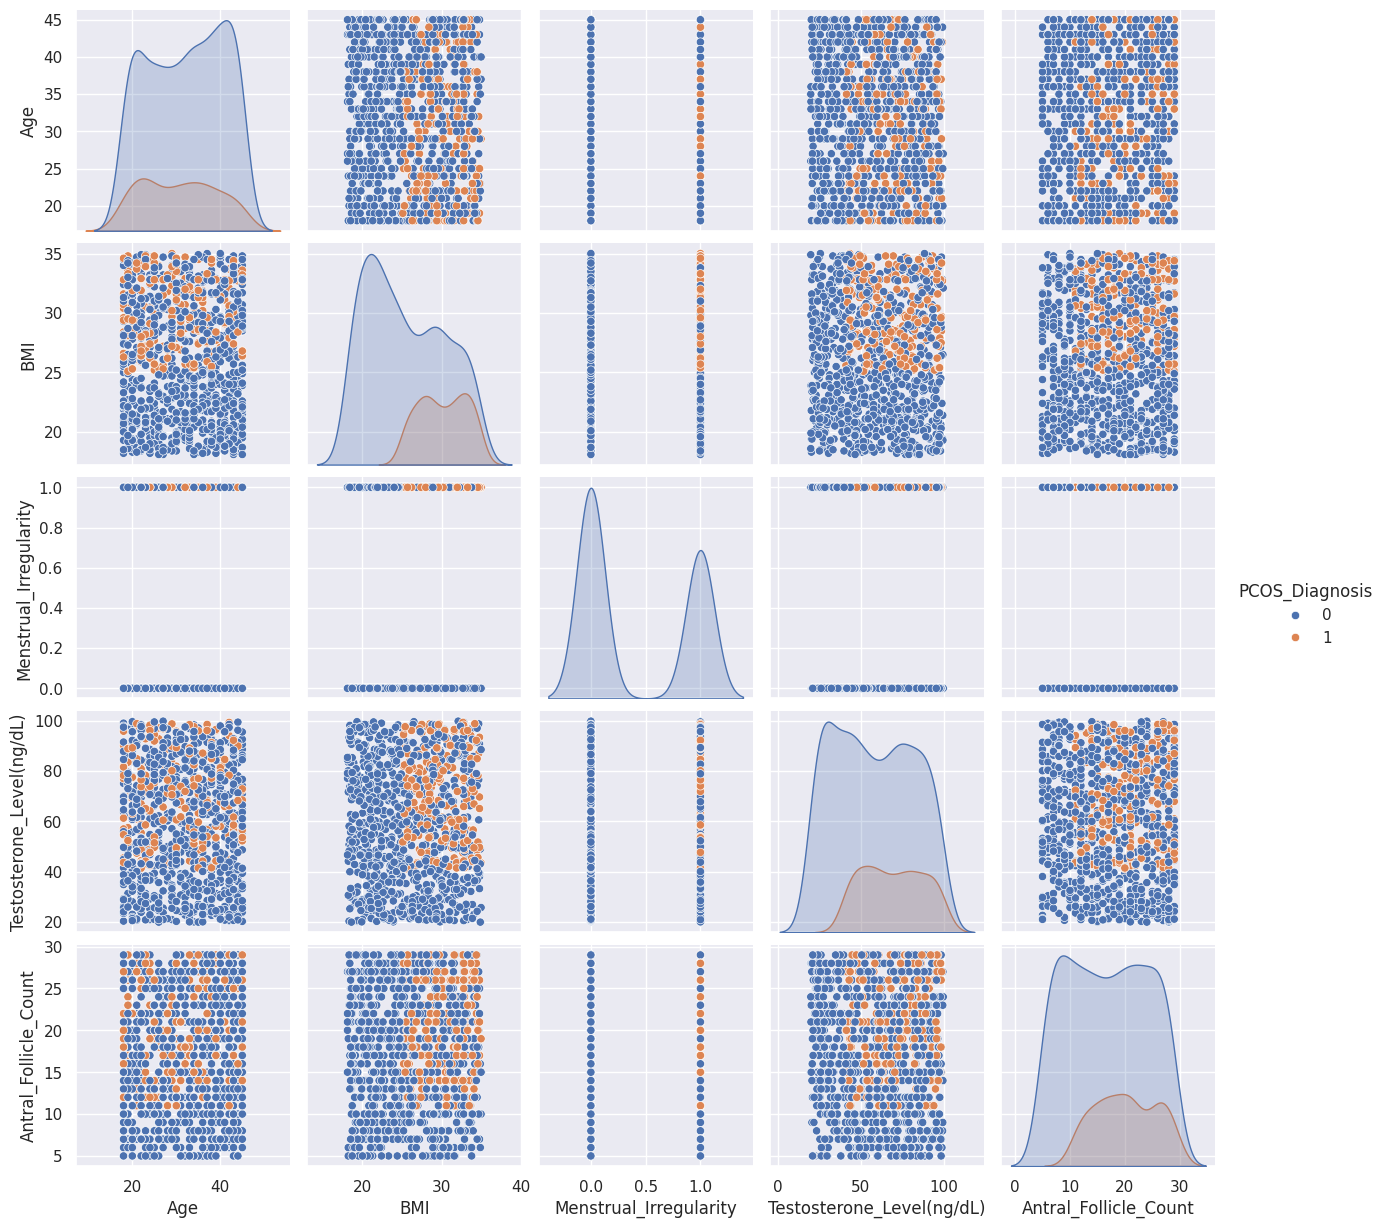

In [ ]:
#visualisasi warna dibedakan berdasarkan PCOS_Diagnosis apakah mengidap PCOS atau tidak
import seaborn as sns
sns.set()
sns.pairplot(data_PCOS, vars=['Age', 'BMI', 'Menstrual_Irregularity', 'Testosterone_Level(ng/dL)',
            'Antral_Follicle_Count'], hue='PCOS_Diagnosis')

Variabel yang dipilih untuk dianalisis meliputi 'Age', 'BMI' 'Menstrual_Irregularity', 'Testosterone_Level(ng/dL)', dan 'Antral_Follicle_Count'. Kelima varibel ini digunakan untuk menentukan variabel-variabel yang ingin dimunculkan dalam pairploy. hue='PCOS_Diagnosis': variabel PCOS_Diagnosis akan digunakan untuk membedakan data.

Dalam kasus ini, warna plot akan diberikan berdasarkan nilai dari kolom 'Outcome', yaitu apakah pasien memiliki diabetes atau tidak. Dengan menggunakan pairplot dan membagi warna berdasarkan 'PCOS_Diagnosis', setiap scatter plot dalam grid akan menunjukkan hubungan antara dua variabel, di mana titik-titik diberi warna yang berbeda tergantung pada apakah pasien mengidap PCOS atau tidak. Ini membantu untuk melihat pola atau tren yang mungkin ada dalam hubungan antar variabel dan bagaimana pola tersebut berkaitan dengan keberadaan PCOS dalam dataset.

**Menghitung nilai korelasi antara setiap variabel dengan PCOS_Diagnosis**

In [ ]:
import seaborn as sns
import pandas as pd


# Menghitung korelasi antara setiap variabel dengan 'PCOS_Diagnosis'
correlation_with_PCOS_Diagnosis = data_PCOS.corr()['PCOS_Diagnosis'].sort_values(ascending=False)

# Menampilkan korelasi setiap variabel dengan 'PCOS_Diagnosis'
print(correlation_with_PCOS_Diagnosis)

PCOS_Diagnosis               1.000000
Menstrual_Irregularity       0.469376
BMI                          0.377852
Testosterone_Level(ng/dL)    0.200817
Antral_Follicle_Count        0.192014
Age                         -0.064675
Name: PCOS_Diagnosis, dtype: float64


Keterangan Hasil:

Nilai korelasi ini berkisar antara -1 hingga 1.

Korelasi Positif: Nilai korelasi mendekati 1 menunjukkan korelasi positif yang kuat. Misalnya, Menstrual_Irregularity memiliki korelasi sebesar 0.469376 dengan PCOS_Diagnose, artinya ada hubungan positif yang cukup kuat antara ketidakteraturan menstruasi dengan Diagnosa mengidap PCOS.

Korelasi Negatif: Nilai korelasi mendekati -1 menunjukkan korelasi negatif yang kuat. Misalnya, Age memiliki korelasi sebesar -0,064675 dengan PCOS_Diagnose, artinya seiring bertambahnya usia, kemungkinan seseorang ddidiagnosis mengidap PCOS cenderung sedikit menurun (kekuatan hubungan sangat lemah).

Korelasi Dekat dengan 0: Nilai korelasi mendekati 0 menunjukkan korelasi yang lemah atau tidak ada korelasi yang signifikan antara variabel tersebut dengan 'PCOS_Diagnosis'.

Melalui nilai korelasi dapat membantu untuk memahami sejauh mana setiap variabel memiliki hubungan dengan variabel target yaitu PCOS_Diagnosis (Mengidap PCOS atau tidak). Semakin tinggi nilai korelasi (positif atau negatif), semakin besar hubungan antara variabel tersebut dengan keberadaan PCOS pada dataset.

**2). Melakukan Preprocessing Data**

In [ ]:
#urutan data
data_PCOS.head()

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
0,24,34.7,1,25.2,20,0
1,37,26.4,0,57.1,25,0
2,32,23.6,0,92.7,28,0
3,28,28.8,0,63.1,26,0
4,25,22.1,1,59.8,8,0


Dataset berisi informasi meneganai karakteristik klinis pasien dan dapat digunakan untuk memprediksi atau menganalisis faktor-faktor risiko terkait dengan *Polycystic Ovary Syndrome* (PCOS).

Setiap baris dalam dataset mewakili satu pasien yang diamati. Kolom-kolom yang ada merupakan adalah fitur (indikator-indikator) yang diamati pada setiap pasien tersebut.

Berikut adalah penjelasan dari setiap variabelnya:

*   Age = Usia pasien yang diamati.
*   BMI = Indeks massa tubuh pasien, dihitung berdasarkan berat dan tinggi badan (kg/m^2).
*   Menstrual Irregularity    = ketidakteraturan menstruasi (kondisi ketika siklus menstruasi tidak teratur). Berlabel dengan nilai 1 untuk kasus positif (pasien mengalami menstruasi yang tidak teratur) dan 0 untuk kasus negatif (pasien mengalami menstruasi yang teratur).
*   Testosterone Level (ng/dL) = jumlah hormon testosteron dalam darah (ng/dL).
*   Antral Follicle Count = jumlah folikel antral dalam ovarium wanita.
*   PCOS Diagnosis = kategori pasien yang mengalami diagnosa mengidap PCOS. Berlabel dengan nilai 1 untuk kasus positif (pasien didiagnosa mengidap PCOS) dan 0 untuk kasus negatif (pasien didiagnosa tidak mengidap PCOS).


In [ ]:
data_PCOS.tail()

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
995,34,18.4,1,95.7,23,0
996,45,28.9,1,28.5,7,0
997,37,28.3,0,32.4,28,0
998,41,27.3,0,95.6,9,0
999,22,21.9,1,78.9,7,0


Total data pada dataset tersebut yaitu sebanyak 999 pengamatan.

In [ ]:
# Melihat statistika deskriptif
data_PCOS.describe()

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,31.771000,26.38700,0.530000,60.159500,17.469000,0.199000
std,8.463462,4.93554,0.499349,23.160204,7.069301,0.399448
min,18.000000,18.10000,0.000000,20.000000,5.000000,0.000000
25%,24.000000,21.90000,0.000000,41.700000,12.000000,0.000000
50%,32.000000,26.40000,1.000000,60.000000,18.000000,0.000000
75%,39.000000,30.50000,1.000000,80.300000,23.250000,0.000000
max,45.000000,35.00000,1.000000,99.800000,29.000000,1.000000


**Identifikasi Missing Value dalam Dataset**

In [ ]:
data_PCOS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        1000 non-null   int64  
 1   BMI                        1000 non-null   float64
 2   Menstrual_Irregularity     1000 non-null   int64  
 3   Testosterone_Level(ng/dL)  1000 non-null   float64
 4   Antral_Follicle_Count      1000 non-null   int64  
 5   PCOS_Diagnosis             1000 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 47.0 KB


In [ ]:
data_PCOS.isnull()

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
995,False,False,False,False,False,False
996,False,False,False,False,False,False
997,False,False,False,False,False,False
998,False,False,False,False,False,False


In [ ]:
np.sum(data_PCOS.isnull())

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,0
Age,0
BMI,0
Menstrual_Irregularity,0
Testosterone_Level(ng/dL),0
Antral_Follicle_Count,0
PCOS_Diagnosis,0


In [ ]:
# Mengetahui jumlah missing value di seluruh dataset
data_PCOS.isnull().sum().sum()

np.int64(0)

Dalam dataset ini tidak memiliki missing value pada semua variabel yang ada.

**Identifikasi Outlier dalam Dataset**

**Boxplot**

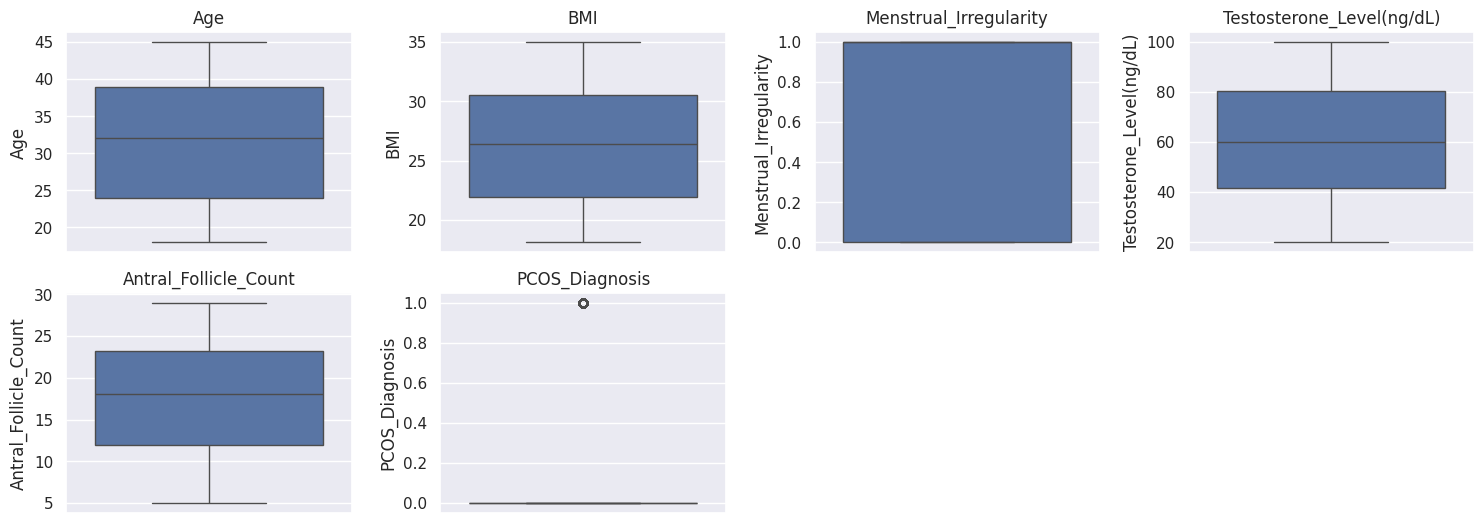

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Kolom numerik yang ingin dicek outliernya
num_cols = ['Age', 'BMI', 'Menstrual_Irregularity', 'Testosterone_Level(ng/dL)',
            'Antral_Follicle_Count', 'PCOS_Diagnosis']

# Visualisasi Boxplot
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=data_PCOS[col])
    plt.title(col)
plt.tight_layout()
plt.show()


**Dengan Interquartile Range (IQR)**

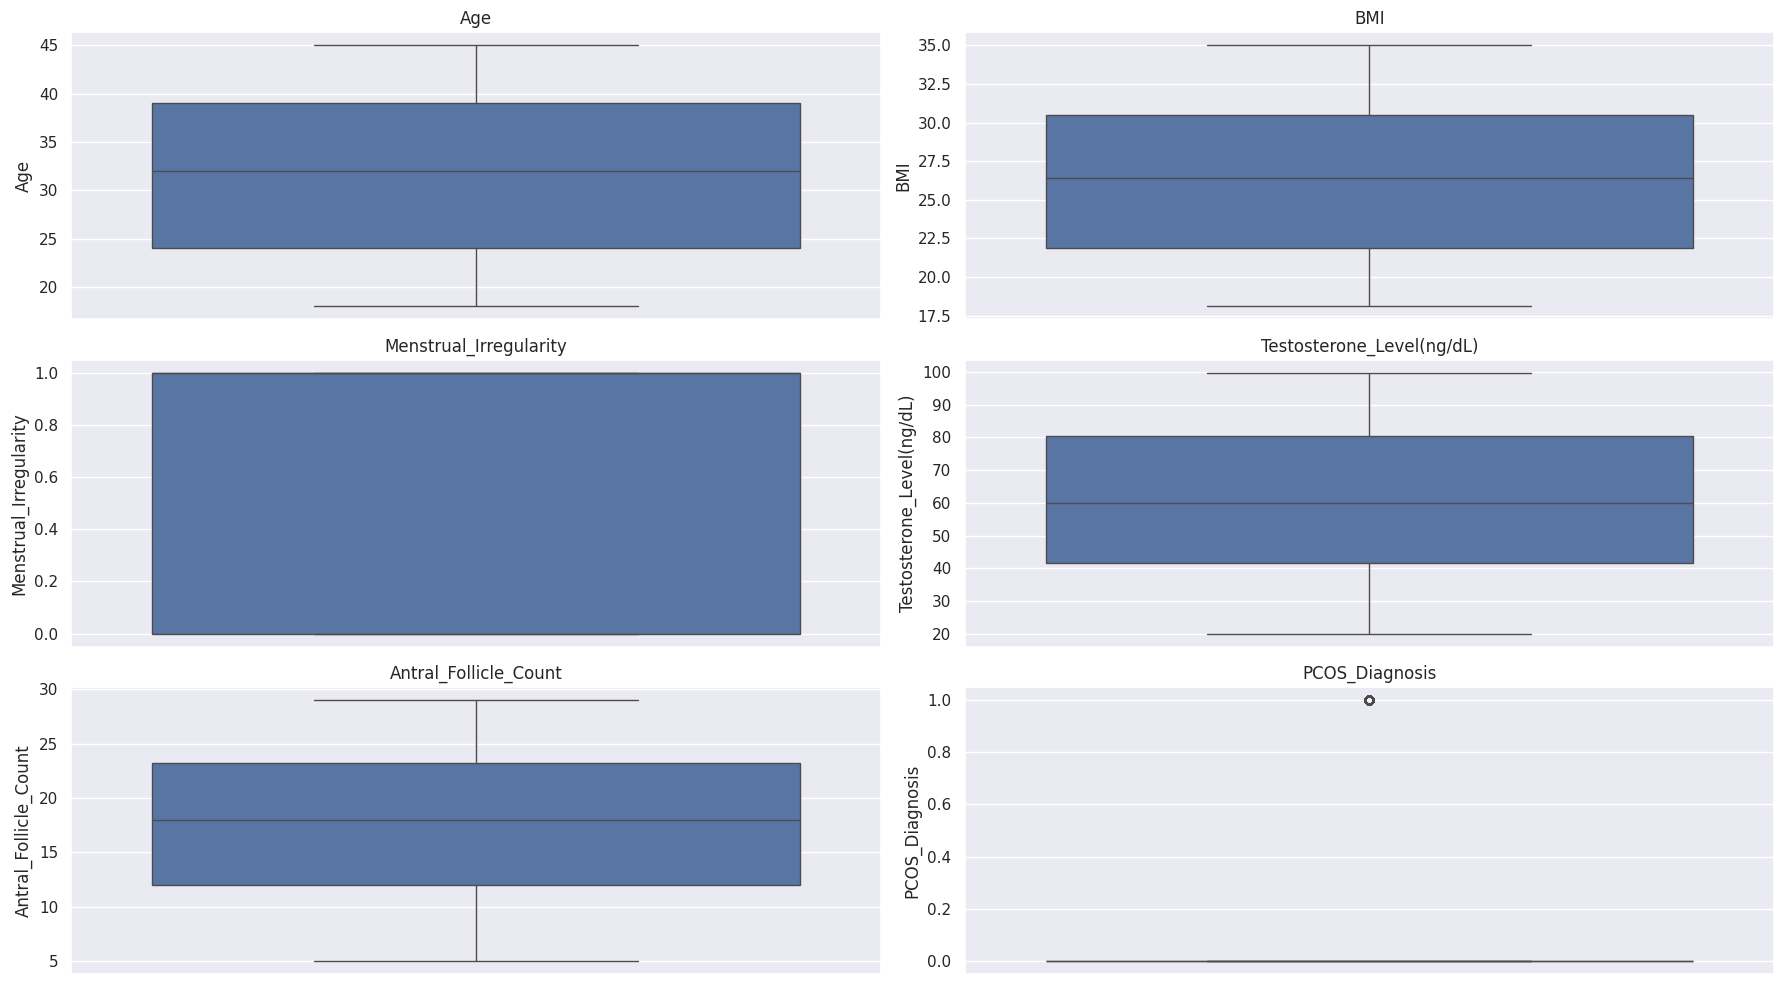

Age: 0 outliers
BMI: 0 outliers
Menstrual_Irregularity: 0 outliers
Testosterone_Level(ng/dL): 0 outliers
Antral_Follicle_Count: 0 outliers
PCOS_Diagnosis: 199 outliers


In [ ]:
# Kolom numerik yang ingin dicek outliernya
# Menghapus kolom non-numerik dari num_cols
num_cols = [ 'Age', 'BMI', 'Menstrual_Irregularity', 'Testosterone_Level(ng/dL)',
            'Antral_Follicle_Count', 'PCOS_Diagnosis']

# Visualisasi Boxplot
#Increased the figsize to better accommodate the plots.
plt.figure(figsize=(18, 10))
#Modified the subplots to have 3 rows and 2 columns to accommodate 6 plots.
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 2, i) # Adjust subplot grid to 3 rows and 2 columns
    sns.boxplot(y=data_PCOS[col])
    plt.title(col)
plt.tight_layout()
plt.show()

def detect_outliers_iqr(data_PCOS, column):
    Q1 = data_PCOS[column].quantile(0.25)  # Kuartil 1
    Q3 = data_PCOS[column].quantile(0.75)  # Kuartil 3
    IQR = Q3 - Q1  # Rentang interkuartil
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data_PCOS[(data_PCOS[column] < lower_bound) | (data_PCOS[column] > upper_bound)]

# Cek jumlah outlier untuk setiap kolom numerik
for col in num_cols:
    outliers = detect_outliers_iqr(data_PCOS, col)
    print(f"{col}: {len(outliers)} outliers")

Berdasarkan hasil cek outlier didaptkan bahwa pada variabel PCOS_Diadnosis terdapat 199 outliers.

**Penanganan Outlier**

In [ ]:
def winsorize_iqr(data_PCOS, column):
    Q1 = data_PCOS[column].quantile(0.25)
    Q3 = data_PCOS[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data_PCOS[column] = np.where(data_PCOS[column] < lower_bound, lower_bound, data_PCOS[column])
    data_PCOS[column] = np.where(data_PCOS[column] > upper_bound, upper_bound, data_PCOS[column])

# Terapkan Winsorizing
for col in num_cols:
    winsorize_iqr(data_PCOS, col)

**Mengecek kembali outlier (dengan IQR) setelah ditangani**

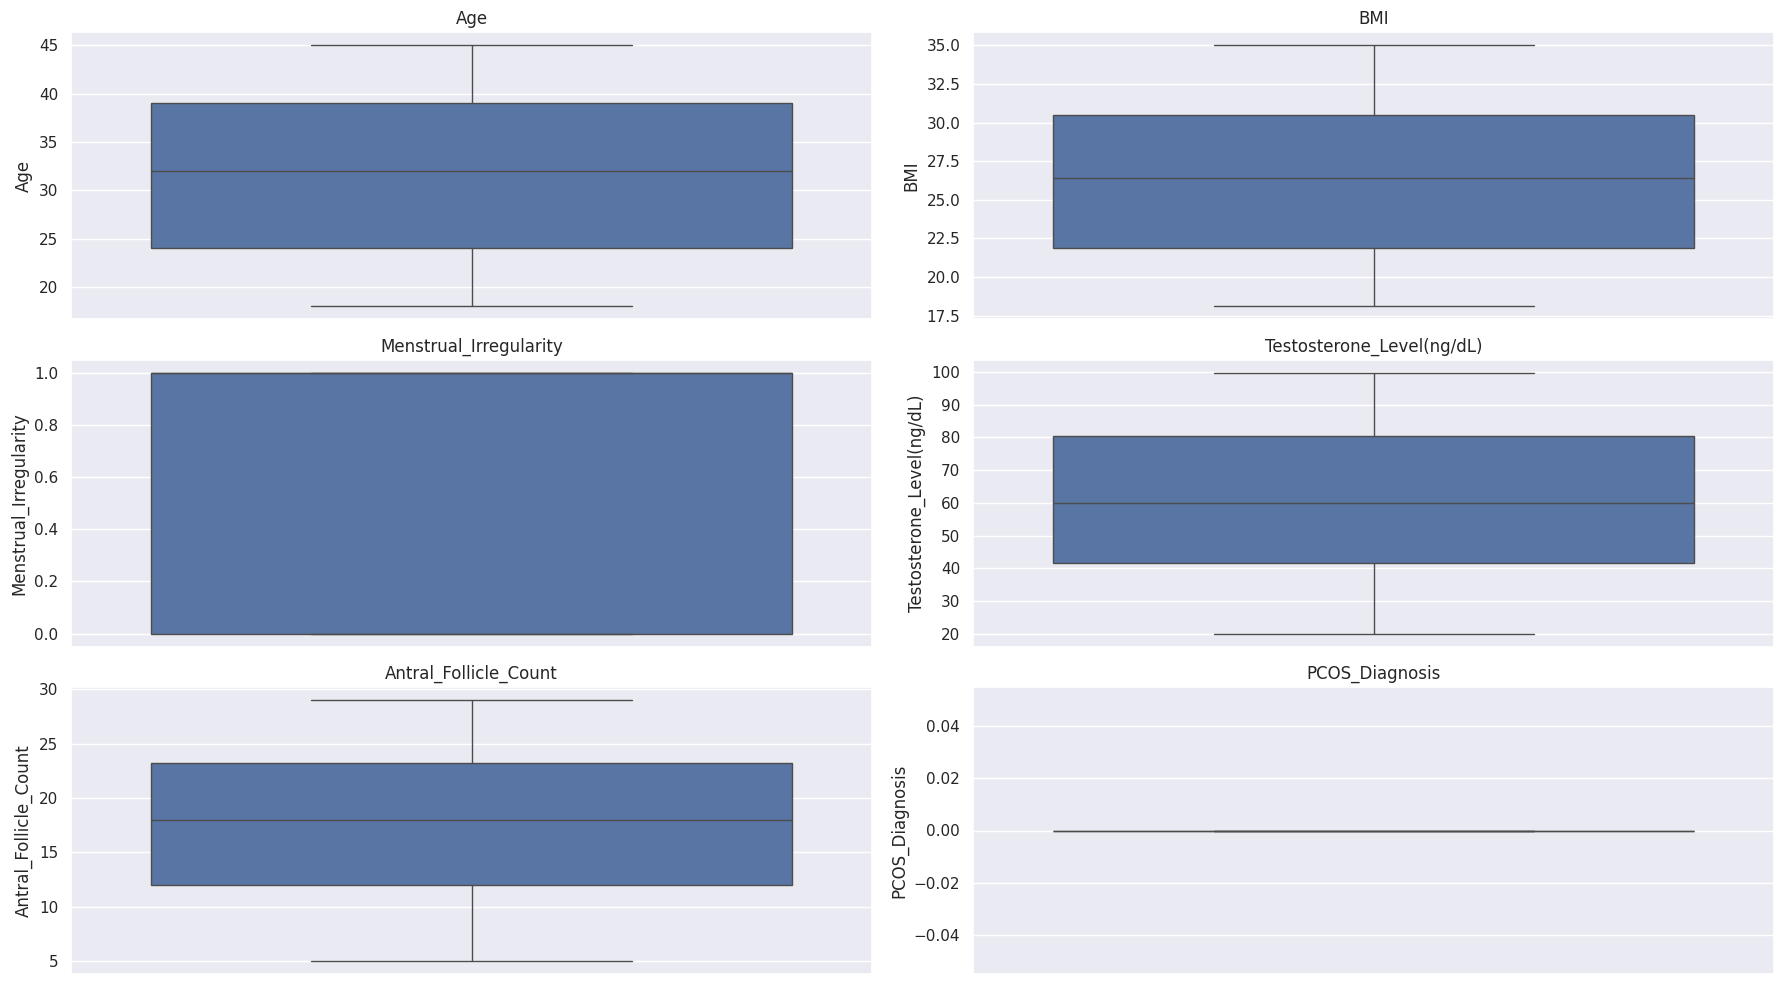

Age: 0 outliers
BMI: 0 outliers
Menstrual_Irregularity: 0 outliers
Testosterone_Level(ng/dL): 0 outliers
Antral_Follicle_Count: 0 outliers
PCOS_Diagnosis: 0 outliers


In [ ]:
# Cek ulang outlier setelah ditangani
num_cols = [ 'Age', 'BMI', 'Menstrual_Irregularity', 'Testosterone_Level(ng/dL)',
            'Antral_Follicle_Count', 'PCOS_Diagnosis']

# Visualisasi Boxplot Lagi
#Increased the figsize to better accommodate the plots.
plt.figure(figsize=(18, 10))
#Modified the subplots to have 3 rows and 2 columns to accommodate 6 plots.
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 2, i) # Adjust subplot grid to 3 rows and 2 columns
    sns.boxplot(y=data_PCOS[col])
    plt.title(col)
plt.tight_layout()
plt.show()

def detect_outliers_iqr(data_PCOS, column):
    Q1 = data_PCOS[column].quantile(0.25)  # Kuartil 1
    Q3 = data_PCOS[column].quantile(0.75)  # Kuartil 3
    IQR = Q3 - Q1  # Rentang interkuartil
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data_PCOS[(data_PCOS[column] < lower_bound) | (data_PCOS[column] > upper_bound)]

# Cek ulang jumlah outlier untuk setiap kolom numerik
for col in num_cols:
    outliers = detect_outliers_iqr(data_PCOS, col)
    print(f"{col}: {len(outliers)} outliers")

Berdasarkan hasil yang diperoleh, terlihat bahwa sudah tidak terdapat outlier pada seluruh variabel dalam dataset.

**3). Analisis klasifikasi menggunakan Naive Bayes dan KNN**

*   **Langkah Pemodelan**

**a. Langkah Pemodelan Naive Bayes**

1. Mengimpor pustaka yang diperlukan
2. Membaca dataset dan melakukan pembersihan data
3. Menentukan fitur (X) dan target (Y)
4. Melakukan normalisasi data
5. Membagi data menjadi data latih dan data uji
6. Membuat model Naive Bayes
7. Melatih model menggunakan data latih yang telah dinormalisasi
8. Memprediksi hasil klasifikasi pada data uji
9. Melakukan evaluasi model menggunakan confusion matrix, classification report, dan nilai akurasi
10. Visualisasi hasil evaluasi


**b. Langkah Pemodelan KNN**

1. Mengimpor pustaka yang diperlukan
2. Membaca dataset dan melakukan pembersihan data
3. Menentukan fitur (X) dan target (Y)
4. Melakukan normalisasi data
5. Membagi data menjadi data latih dan data uji
6. Membuat model KNN
7. Melatih model KNN menggunakan data latih yang telah dinormalisasi
8. Memprediksi hasil klasifikasi pada data uji
9. Melakukan evaluasi model menggunakan confusion matrix, classification report, dan nilai akurasi
10. Visualisasi hasil evaluasi

*   **Evaluasi model menggunakan confusion matrix dan akurasi**

In [48]:
# Impor library yang dibutuhkan
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [43]:
# Membaca dataset yang telah di unggah
data_PCOS = pd.read_csv("/content/pcos_dataset.csv")
data_PCOS

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
0,24,34.7,1,25.2,20,0
1,37,26.4,0,57.1,25,0
2,32,23.6,0,92.7,28,0
3,28,28.8,0,63.1,26,0
4,25,22.1,1,59.8,8,0
...,...,...,...,...,...,...
995,34,18.4,1,95.7,23,0
996,45,28.9,1,28.5,7,0
997,37,28.3,0,32.4,28,0
998,41,27.3,0,95.6,9,0


In [44]:
# Memisahkan data menjadi variabel x dan y
X=data_PCOS.drop(['PCOS_Diagnosis'], axis=1)
y=data_PCOS['PCOS_Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [45]:
# Melakukan normalisasi data
X_train = MinMaxScaler().fit_transform(X_train)
X_test = MinMaxScaler().fit_transform(X_test)

print(X_train)

[[0.77777778 0.59763314 0.         0.50125313 0.375     ]
 [0.77777778 0.08284024 1.         0.89097744 0.625     ]
 [0.96296296 0.40828402 0.         0.02756892 0.58333333]
 ...
 [0.44444444 0.42011834 1.         0.77568922 0.95833333]
 [0.07407407 0.82248521 0.         0.29824561 0.41666667]
 [0.7037037  0.06508876 1.         0.95989975 0.54166667]]


**Naive Bayes**

In [55]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

# fit train set pake Gaussian Naive Bayes
nb.fit(X_train, y_train)

GaussianNB()

In [52]:
# compute the accuracy of train set
nb.score(X_train, y_train)

0.66875

In [57]:
#Evaluasi Naive Bayes
print("\n=== Evaluasi Naive Bayes ===")
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))
print("Akurasi Naive Bayes:", accuracy_score(y_test, y_pred_nb))


=== Evaluasi Naive Bayes ===
[[96 66]
 [ 0 38]]
              precision    recall  f1-score   support

           0       1.00      0.59      0.74       162
           1       0.37      1.00      0.54        38

    accuracy                           0.67       200
   macro avg       0.68      0.80      0.64       200
weighted avg       0.88      0.67      0.70       200

Akurasi Naive Bayes: 0.67


**K-Nearest Neighbors (KNN)**

In [58]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

In [59]:
# Evaluasi KNN
print("\n=== Evaluasi KNN ===")
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))
print("Akurasi KNN:", accuracy_score(y_test, y_pred_knn))


=== Evaluasi KNN ===
[[154   8]
 [  3  35]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       162
           1       0.81      0.92      0.86        38

    accuracy                           0.94       200
   macro avg       0.90      0.94      0.91       200
weighted avg       0.95      0.94      0.95       200

Akurasi KNN: 0.945


*   **Visualisasi Hasil**

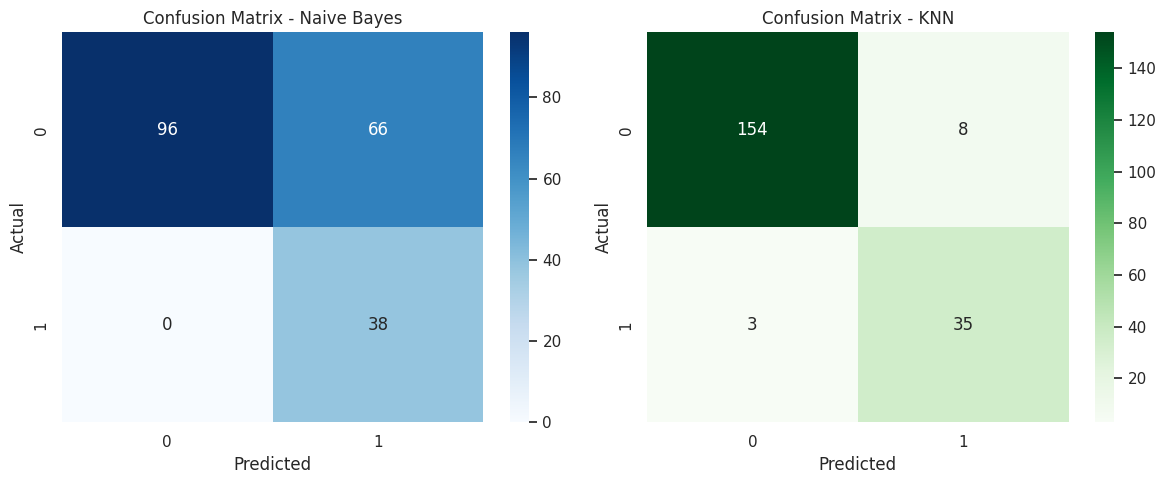

In [62]:
# Visualisasi menggunakan confusion matrix

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Confusion Matrix - Naive Bayes')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Greens', ax=ax[1])
ax[1].set_title('Confusion Matrix - KNN')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')


plt.tight_layout()
plt.show()

*   **Perbandingan klasifikasi antara Naïve Bayes dengan KNN**

In [68]:
#Nilai akurasi
print("\nPerbandingan Akurasi:")
print(f"Akurasi Naive Bayes: {accuracy_score(y_test, y_pred_nb):.4f}")
print(f"Akurasi KNN        : {accuracy_score(y_test, y_pred_knn):.4f}")


Perbandingan Akurasi:
Akurasi Naive Bayes: 0.6700
Akurasi KNN        : 0.9450


**Hasil Akurasi Model:**

Naive Bayes menghasilkan akurasi sebesar 0.6700 atau 67%, sedangkan untuk KNN menghasilkan akurasi sebesar 0.9450 atau 94.5%



**Perbandingan Hasil Klasifikasi:**

*   Model Naive Bayes menghasilkan akurasi sebesar 67%, yang menunjukkan bahwa model ini mampu mengklasifikasikan data dengan tingkat ketepatan yang sedang. Hal ini dapat disebabkan oleh asumsi independensi antar fitur yang digunakan dalam Naive Bayes, yang kemungkinan tidak sepenuhnya terpenuhi dalam data ini.
*   Model KNN menghasilkan akurasi yang jauh lebih tinggi, yaitu sebesar 94.5%. Hasil ini menunjukkan bahwa model KNN memiliki kemampuan klasifikasi yang sangat baik terhadap dataset ini, karena KNN tidak mengasumsikan distribusi data tertentu dan bekerja dengan pendekatan berbasis kedekatan jarak (tetangga/neighbors) antar data.

**Kesimpulan**

Dengan demikian, dapat disimpulkan bahwa KNN memiliki performa yang jauh lebih unggul dibandingkan Naive Bayes dalam mengklasifikasikan kasus diagnosis PCOS pada dataset ini. Oleh karena itu, KNN lebih direkomendasikan untuk digunakan dalam konteks pemodelan klasifikasi pada data ini, terutama ketika tingkat akurasi yang tinggi menjadi prioritas.

